In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import linear_model
from numpy import genfromtxt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier   
from sklearn.decomposition import PCA
from sklearn import tree
from imblearn.over_sampling import ADASYN 
from collections import Counter
from fancyimpute import KNN,BiScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier  #梯度提升树
from sklearn import svm
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from  numpy  import   array
from  numpy  import  argmax
from  sklearn.model_selection import train_test_split

from Codebase11 import Valuestandard
from Codebase11 import ConfusionMatrix
from Codebase11 import PlotROC
from Codebase11 import PlotDCA
from Codebase11 import DelongTest
from Codebase11 import CompareModel

In [14]:
x_train_standard1 = pd.read_csv('x_train_standard1.csv')
x_test_standard1 = pd.read_csv('x_test_standard1.csv')

In [17]:
x_train_standard2 = x_train_standard1.drop(columns=['creatinine','TG'])
x_test_standard2 = x_test_standard1.drop(columns=['creatinine','TG'])

In [18]:
data = pd.read_csv('stroke1905.csv')
x = data.drop(columns=['mrs'])
y = data["mrs"].copy()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

SVM

In [19]:
from sklearn.svm import SVC
svm=SVC(C=0.5,gamma=0.01,kernel='rbf',probability = True,class_weight = {0:1,1:4},random_state=20)
svm.fit(x_train_standard1,y_train.ravel())
# y_pred_svm = svm.predict(x_train_standard1)
# y_pred_svm_proba = svm.predict_proba(x_train_standard1)

SVC(C=0.5, class_weight={0: 1, 1: 4}, gamma=0.01, probability=True,
    random_state=20)

In [20]:
CM_svm = ConfusionMatrix(svm, x_train_standard1, y_train,Optimal_Threshold='ROC')
CM_svm.metrics()

The Optimal Threshold：0.249

AUROC：0.767
95% CI for AUROC： 0.739 - 0.795
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.498
95% CI for AUPRC： 0.445 - 0.550
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Sensitivity：0.702
Specifity：0.723
PPV：0.429
NPV：0.891
Accuracy：0.718
Precision：0.429
Recall：0.702
F1-Value：0.533


In [21]:
CM_svm1 = ConfusionMatrix(svm,x_test_standard1, y_test, custom_threshold=0.249)
CM_svm1.metrics()

The Threshold：0.249

AUROC：0.762
95% CI for AUROC： 0.705 - 0.819
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.502
95% CI for AUPRC： 0.404 - 0.599
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Sensitivity：0.745
Specifity：0.710
PPV：0.471
NPV：0.889
Accuracy：0.719
Precision：0.471
Recall：0.745
F1-Value：0.577


In [22]:
from sklearn.svm import SVC
svm1=SVC(C=0.5,gamma=0.01,kernel='rbf',probability = True,class_weight = {0:1,1:4},random_state=20)
svm1.fit(x_train_standard2,y_train.ravel())

SVC(C=0.5, class_weight={0: 1, 1: 4}, gamma=0.01, probability=True,
    random_state=20)

In [23]:
CM_svm2 = ConfusionMatrix(svm1, x_train_standard2, y_train,Optimal_Threshold='ROC')
CM_svm2.metrics()

The Optimal Threshold：0.235

AUROC：0.763
95% CI for AUROC： 0.734 - 0.791
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.493
95% CI for AUPRC： 0.441 - 0.545
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Sensitivity：0.725
Specifity：0.688
PPV：0.408
NPV：0.894
Accuracy：0.696
Precision：0.408
Recall：0.725
F1-Value：0.522


In [24]:
CM_svm3 = ConfusionMatrix(svm1,x_test_standard2, y_test, custom_threshold=0.235)
CM_svm3.metrics()

The Threshold：0.235

AUROC：0.766
95% CI for AUROC： 0.709 - 0.823
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.497
95% CI for AUPRC： 0.400 - 0.595
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Sensitivity：0.776
Specifity：0.654
PPV：0.437
NPV：0.894
Accuracy：0.685
Precision：0.437
Recall：0.776
F1-Value：0.559


In [25]:
y_prob = pd.DataFrame(svm.predict_proba(x_test_standard1)[:, 1])
y_prob1 = pd.concat([y_prob, y_test], axis =1)

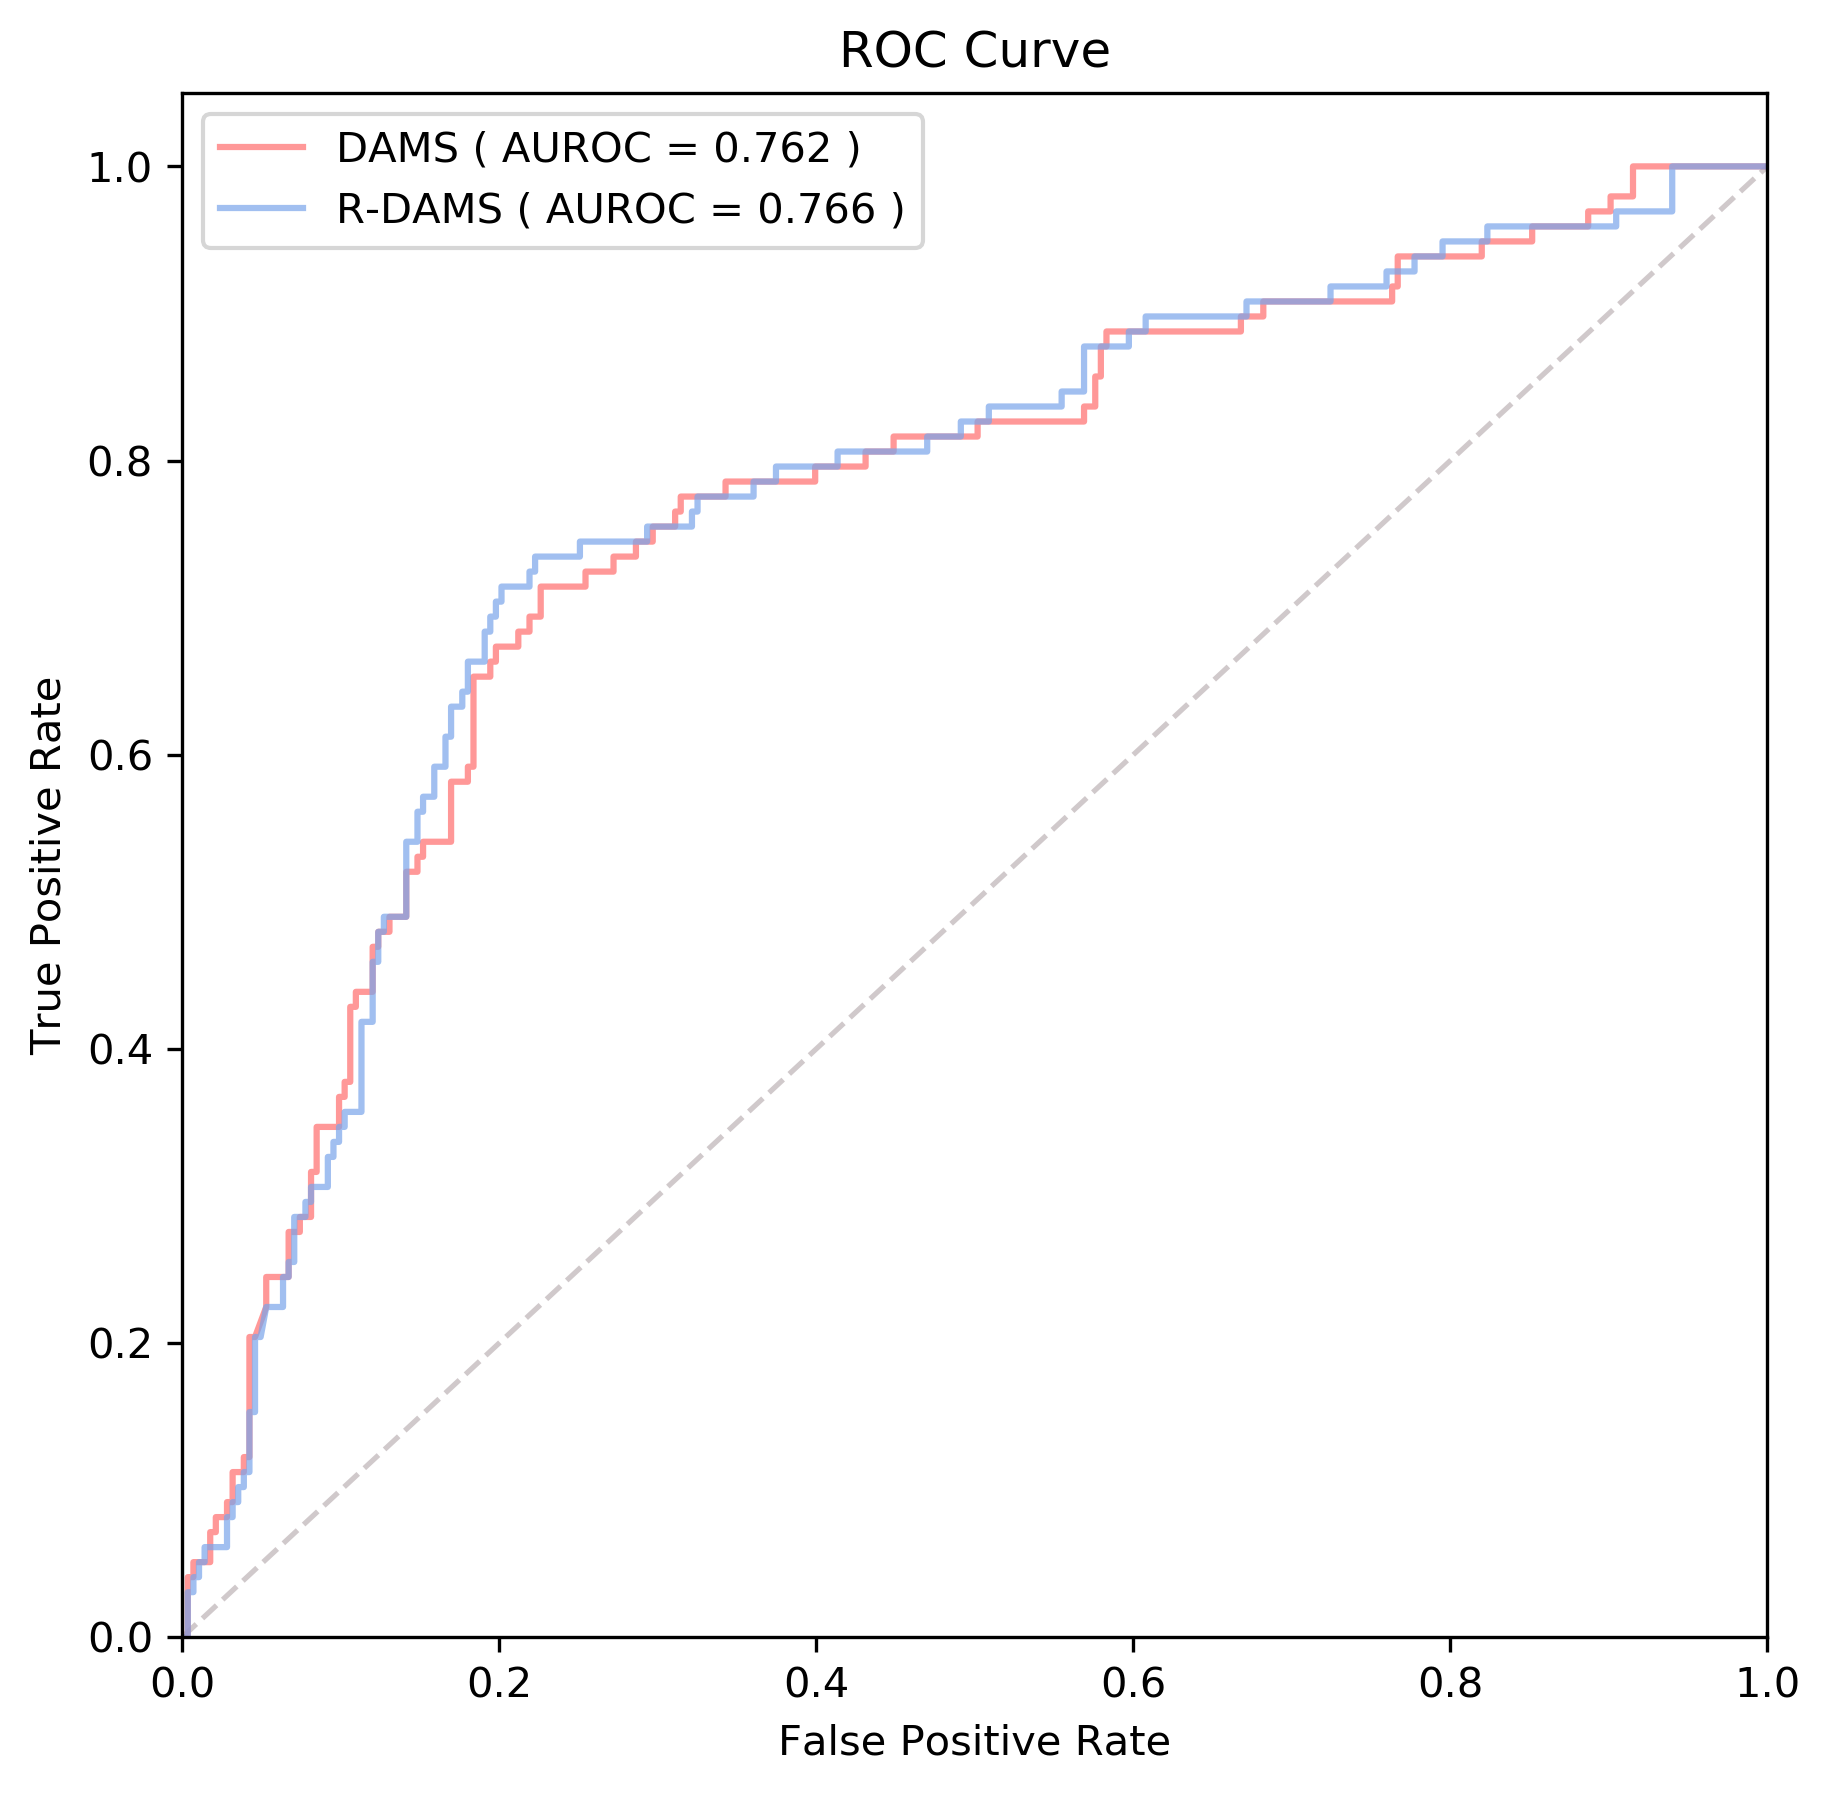

ROC曲线已保存，路径为：C:/Users/Believe/Desktop/小卒中非残疾/DAMS-AUC.png


In [35]:
# CM_Name_List
CM_Name_List1 = [(CM_svm1, 'DAMS'),(CM_svm3, 'R-DAMS')]

ROC1 = PlotROC(CM_Name_List1)

ROC1.plot()

In [29]:
from sklearn.datasets import make_classification as mc
from sklearn.metrics import brier_score_loss 
from sklearn.calibration import calibration_curve 
from sklearn.linear_model import LinearRegression

In [30]:
name = ["DAMS",'R-DAMS']

In [31]:
# Model_Name_List = [(lr, 'LR'),(rfc1, 'RFC'),(svm, 'SVM'),(xgb, 'XGB'),(stroke, 'DNN')]
# DCA = PlotDCA(Model_Name_List)
# DCA.plot(x_test_standard1, y_test, y_max=0.3,x_max=0.5)

DAMS:
	Brier: 0.159 slope:0.935 intercept:0.035
R-DAMS:
	Brier: 0.158 slope:0.789 intercept:0.074


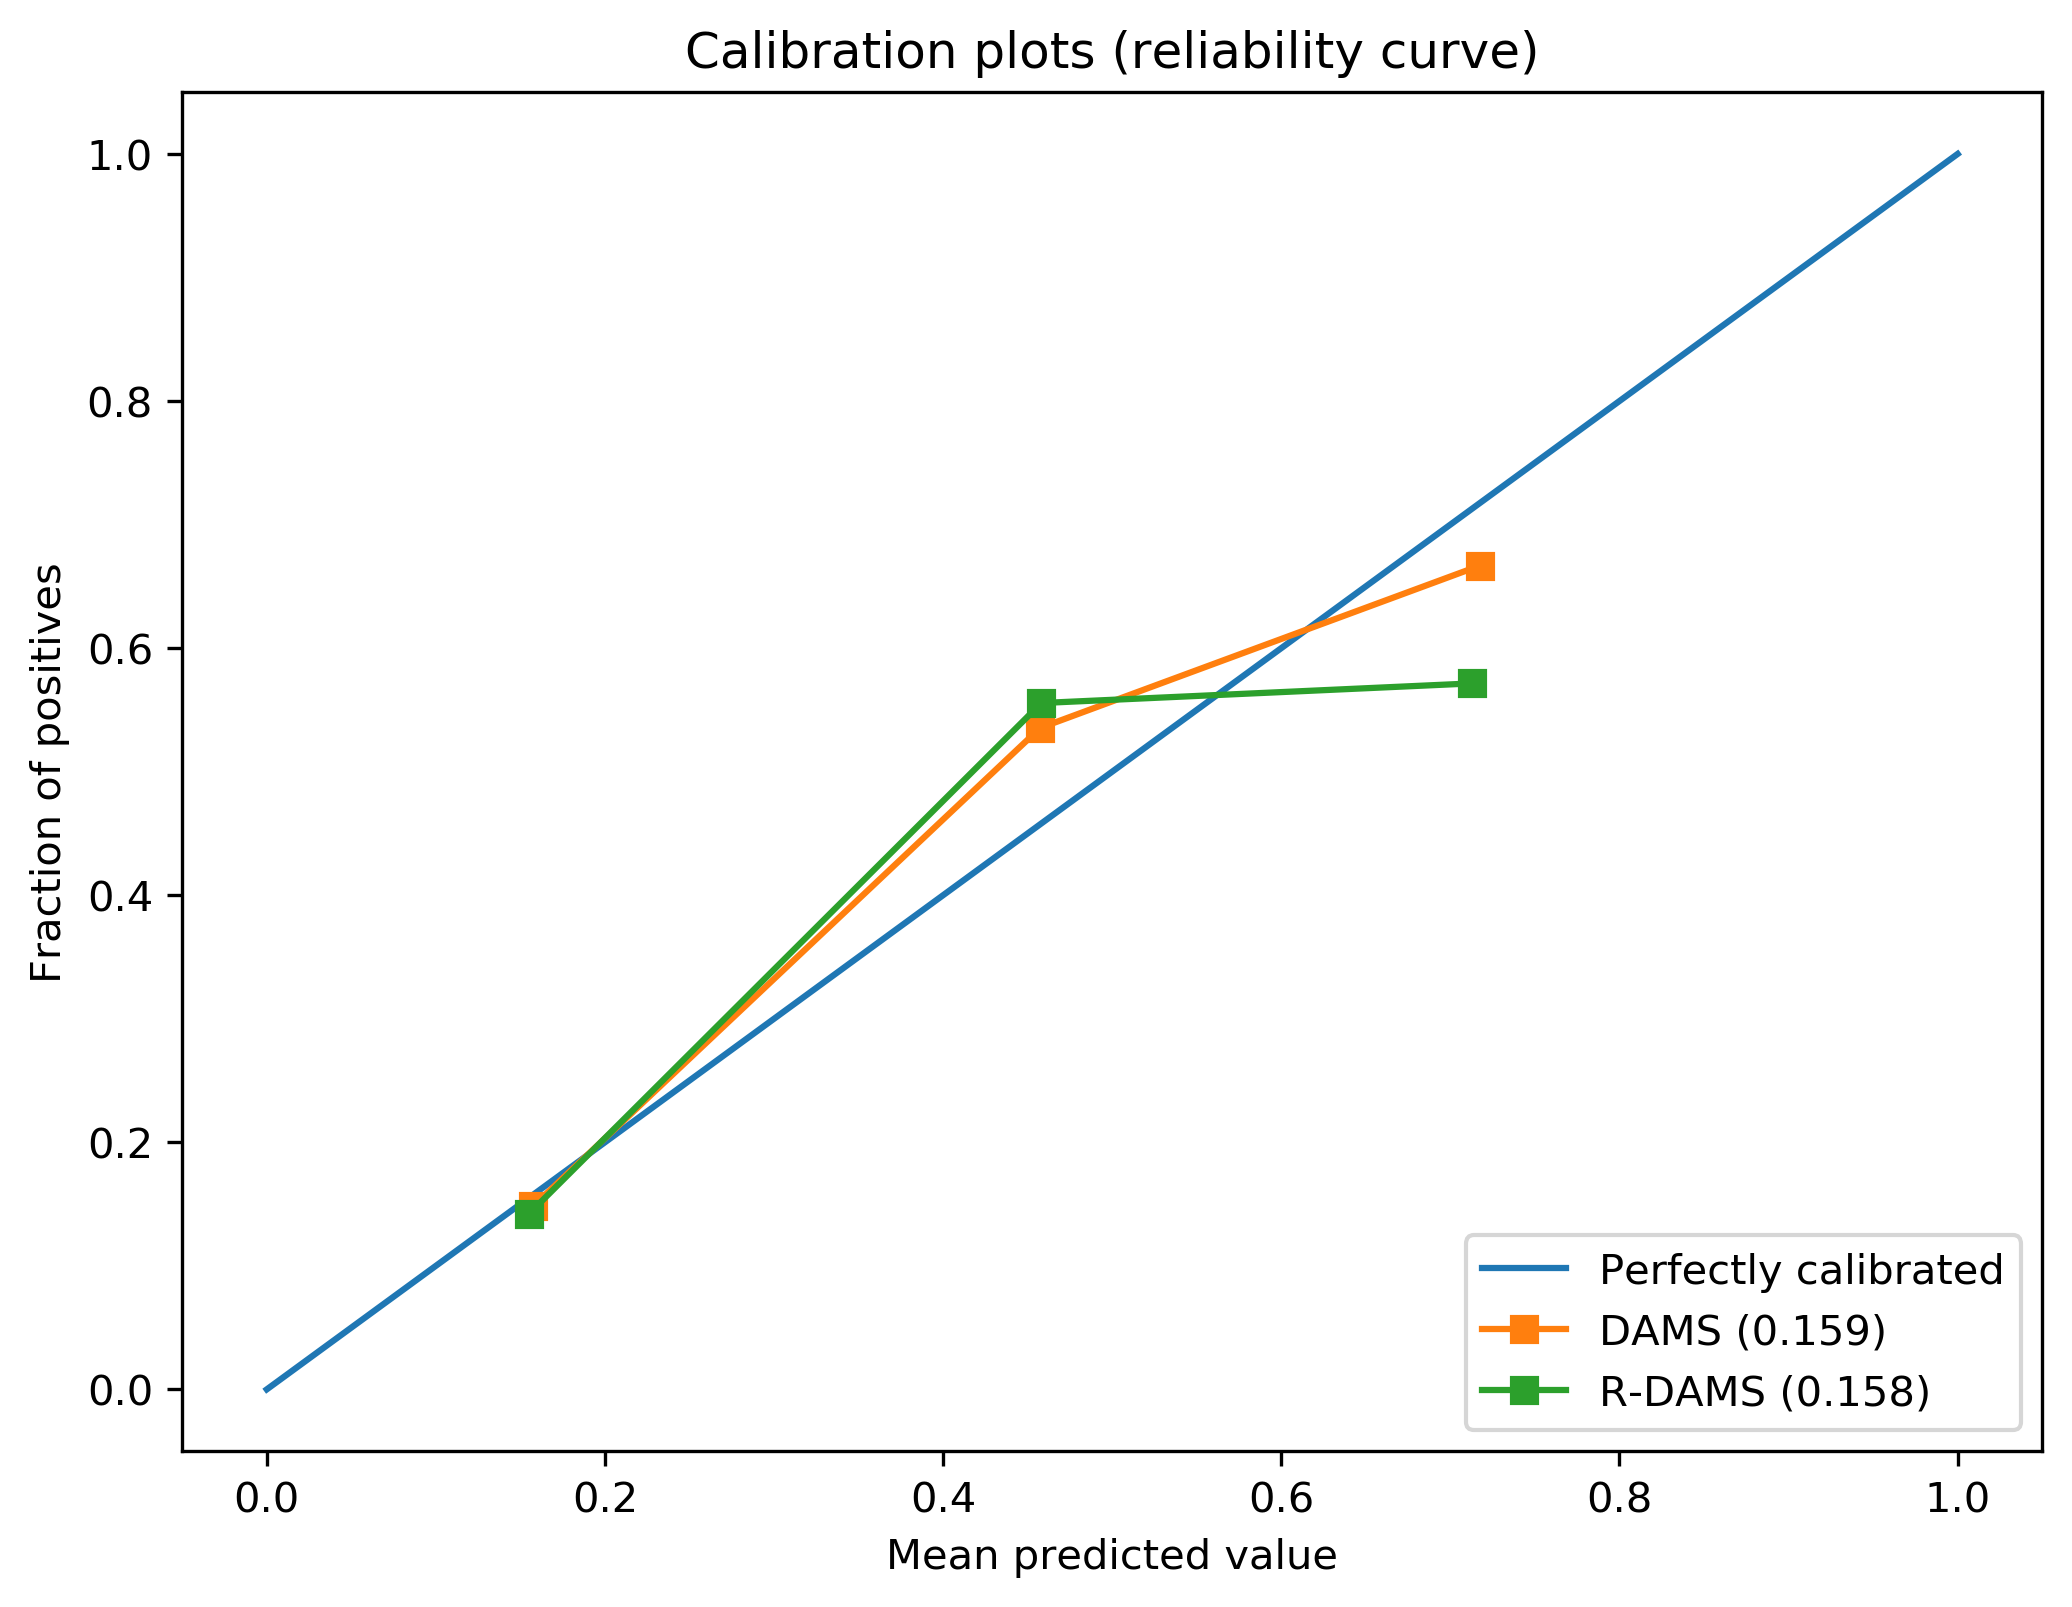

In [32]:
#fraction_of_positives trueproba, mean_predicted_value predproba.
plt.figure(figsize=(8,6),dpi=300)
plt.plot([0,1],[0,1],label = "Perfectly calibrated") 
for clf,name_ in zip([svm,svm1],name):
    
    
    if name_ == 'DAMS':        
        proba_pos = clf.predict_proba(x_test_standard1)[:, 1]
    else:                
        proba_pos = clf.predict_proba(x_test_standard2)[:, 1]
    #
    clf_score = brier_score_loss(y_test, proba_pos)
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, proba_pos, n_bins=3)
    model= LinearRegression()
    model.fit(mean_predicted_value.reshape(-1,1),fraction_of_positives.reshape(-1,1))
    print("%s:" % name_)
    print("\tBrier: %1.3f" % (clf_score),'slope:%1.3f'%model.coef_ ,'intercept:%1.3f'%model.intercept_)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-",label="%s (%1.3f)" % (name_, clf_score))

plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title('Calibration plots (reliability curve)')

plt.show()


In [36]:
def plot_decision_curve(Model_Name_List, x_data1, x_data2,y_data):

    plt.figure(figsize=(6.4, 4.8),dpi=300)
    
    for model, name in Model_Name_List:
        if name == 'DAMS':
            proba_model = model.predict_proba(x_data1)
            y_proba = np.copy(proba_model[:, 1])           
        else:
            proba_model = model.predict_proba(x_data2)
            y_proba = np.copy(proba_model[:, 1])
        
        print(name)
        Y = y_data   
        pt_arr = []           
        net_bnf_arr = []      
        jiduan_arr = []       
        y_proba = y_proba.ravel()  
        for i in range(0,100,1):
            pt = i /100   
            #compute TP FP
            y_pred = np.zeros(y_proba.shape[0])  
            for j in range(y_proba.shape[0]):          #y_proba.shape[0]
                if y_proba[j] >= pt:
                    y_pred[j] = 1
                else:
                    y_pred[j] = 0

            a=confusion_matrix(Y,y_pred)
            TP=a[1,1]
            FP=a[0,1]
            net_bnf = (TP-(FP * pt/(1-pt)) )/Y.shape[0]   
            #print('pt {}, TP {}, FP {}, net_bf {}'.format(pt,TP,FP,net_bnf))
            pt_arr.append(pt)
            net_bnf_arr.append(net_bnf)
          
            #Y = Y.ravel()
            jiduan = (np.sum(Y)-(len(Y)-np.sum(Y))*pt/(1-pt))/len(Y) 
            jiduan_arr.append(jiduan)
        

        plt.plot(pt_arr, net_bnf_arr, lw=1, linestyle='--',label=name)
        

    plt.plot(pt_arr, np.zeros(len(pt_arr)), color='k', lw=1, linestyle='--',label='None')   

 
    plt.plot(pt_arr, jiduan_arr, color='b', lw=1, linestyle='dotted',label='All')

    plt.xlim([0.0, 0.5])
    plt.ylim([-0.1, 0.3])
    plt.xlabel('Threshold Probability')
    plt.ylabel('Net Benefit')
    plt.title('Decision Curve Analysis of Models')
    plt.legend(loc="right")
    plt.savefig('DCA',dpi=300)
    plt.show()

DAMS
R-DAMS


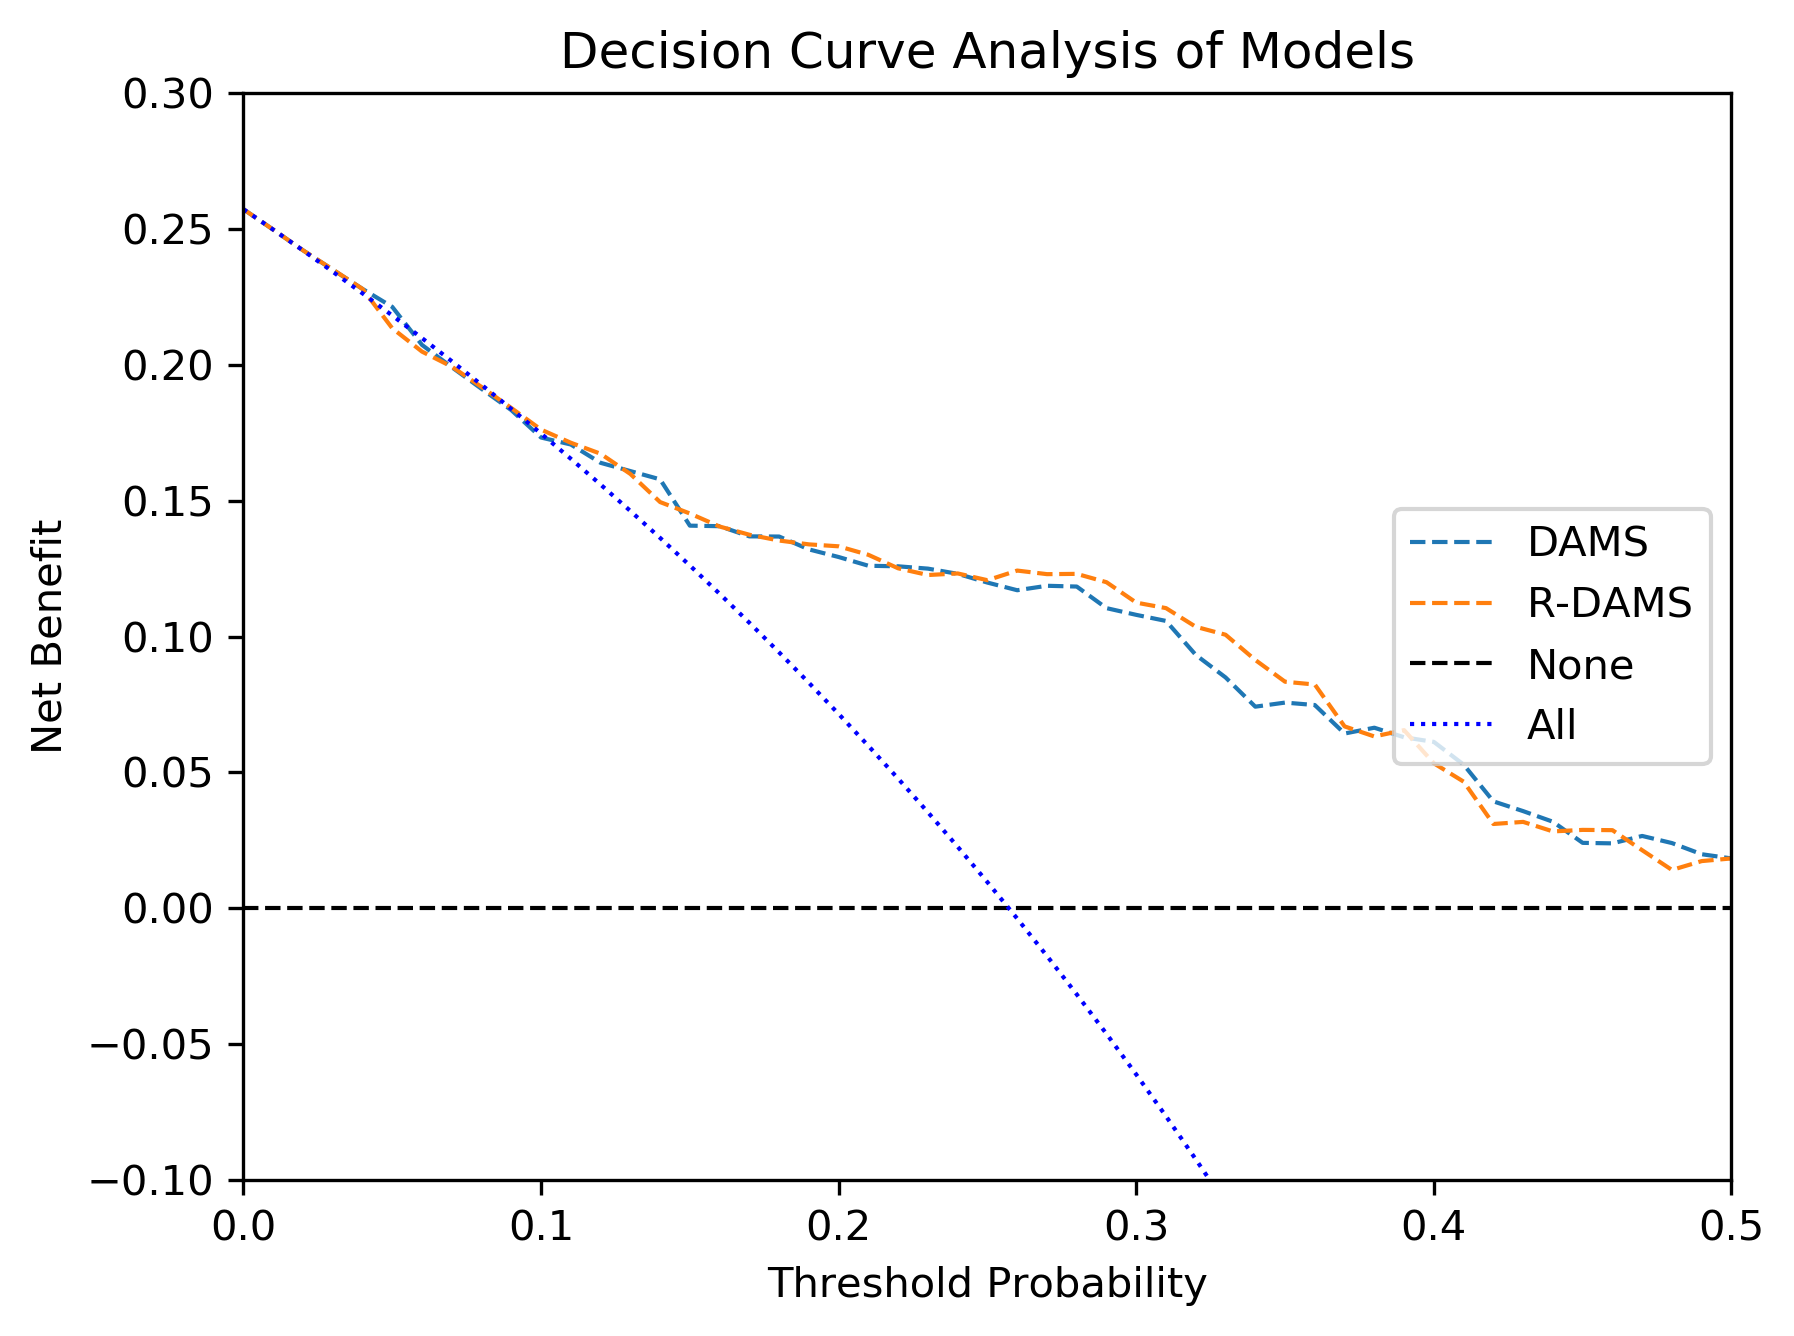

In [37]:
from sklearn.metrics import confusion_matrix
Model_Name_List = [(svm, 'DAMS'),(svm1, 'R-DAMS')]
plot_decision_curve(Model_Name_List, x_test_standard1,x_test_standard2,y_test)